<a id='top'></a>

# Table of Contents

1. [EDA for Station Metadata](#eda_station_meta)
2. [EDA for Speed Data](#eda_station_speed)
3. [EDA for Processed Data](#eda_processed_data)

<a id='eda_station_meta'></a>

# EDA for Station Metadata

**Load**

In [ ]:
import pickle

In [42]:
with open('./data/loaded/meta.dat', 'rb') as f:
    meta = pickle.load(f)
meta

,ID,Fwy,Dir,Latitude,Longitude,Length,Type,Lanes,Abs_PM
0,715898,5,S,33.880183,-118.021787,0.430,ML,3,117.280
1,715900,5,S,33.882892,-118.026822,NaN,OR,1,117.630
2,715901,5,N,33.883400,-118.027451,NaN,OR,1,117.743
3,715903,5,N,33.886992,-118.034125,NaN,OR,1,118.193
4,715904,5,S,33.892489,-118.044573,NaN,OR,1,118.840
...,...,...,...,...,...,...,...,...,...
4878,777066,405,S,34.161152,-118.469631,0.455,ML,3,63.272
4879,777067,405,N,34.161136,-118.469426,0.790,HV,1,63.272
4880,777068,405,S,34.161152,-118.469631,0.790,HV,1,63.272
4881,777168,10,E,34.068993,-118.149756,0.450,HV,1,20.897


**Build Map Visualizing all Stations and General Statistics**

In [ ]:
from folium import Map
import folium.plugins as plugins
import folium

In [ ]:
dir_mapper = {'S': 'south', 'N': 'north', 'E': 'east', 'W': 'west'}
m = Map(location=(34.0522,-118.2437), tiles='https://tile.jawg.io/jawg-dark/{z}/{x}/{y}{r}.png?access-token=yxQukjQJyY3mRrF6htcGR22i1QJ6BP6wslSe2Cmq2k4aT8S0wbDtYMEaPhc8s240', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control_scale=True, max_bounds=True, prefer_canvas=True, zoom_start=10)
for ind, row in meta.iterrows():
    icon = folium.features.CustomIcon(f"./data/icons/{(dir_mapper[row['Dir']])}.png", icon_size=(15, 15))
    style = 'font-family: Impact, Haettenschweiler, "Franklin Gothic Bold", Charcoal, "Helvetica Inserat", "Bitstream Vera Sans Bold", "Arial Black", "sans serif";'
    html = f'''<body style="{style}"><div align="center", style="background-color: #BAD6FF; font-family: Arial">''' + row.to_frame().transpose()[['ID', 'Fwy', 'Length', 'Type', 'Lanes']].transpose().to_html(justify="center", header=False, index=True, index_names=False, col_space=300, classes="table-condensed table-responsive table-success") + '</div></body>' 
    popup = folium.Popup(html, max_width=300)                
    folium.Marker(row[['Latitude', 'Longitude']].values.tolist(), icon=icon, popup=popup).add_to(m)
m.save('./plots/station_map.html')

**Downsample Stations Using RDP**

In [ ]:
from simplification.cutil import (
    simplify_coords,
    simplify_coords_idx,
    simplify_coords_vw,
    simplify_coords_vw_idx,
    simplify_coords_vwp,
)
import pandas as pd

In [ ]:
ds_coords = pd.DataFrame(simplify_coords(meta[["Latitude", 'Longitude']].values, 0.01), columns=['Latitude', 'Longitude'])
ds_coords

**Downsample Stations Using Rules**

All Stations

In [ ]:
m = Map(location=(34.0522,-118.2437), tiles='https://tile.jawg.io/jawg-dark/{z}/{x}/{y}{r}.png?access-token=yxQukjQJyY3mRrF6htcGR22i1QJ6BP6wslSe2Cmq2k4aT8S0wbDtYMEaPhc8s240', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control_scale=True, max_bounds=True, prefer_canvas=True, zoom_start=10)
for ind, row in meta[meta['Dir'] == 'N'].iterrows():
    icon = folium.features.CustomIcon(f"./data/icons/north.png", icon_size=(15, 15))
    style = 'font-family: Impact, Haettenschweiler, "Franklin Gothic Bold", Charcoal, "Helvetica Inserat", "Bitstream Vera Sans Bold", "Arial Black", "sans serif";'
    html = f'''<body style="{style}"><div align="center", style="background-color: #BAD6FF; font-family: Arial">''' + row.to_frame().transpose()[['ID', 'Fwy', 'Length', 'Type', 'Lanes']].transpose().to_html(justify="center", header=False, index=True, index_names=False, col_space=300, classes="table-condensed table-responsive table-success") + '</div></body>' 
    popup = folium.Popup(html, max_width=300)                
    folium.Marker(row[['Latitude', 'Longitude']].values.tolist(), icon=icon, popup=popup).add_to(m)

After Downsampling

In [ ]:
# 1 deg lat = 69 mi
# 1 deg long = 54 mi
distance_between_stations = meta[meta['Dir'] == 'N'].sort_values(['Latitude', 'Longitude'])[['Latitude', 'Longitude']].diff()
stations = distance_between_stations[((distance_between_stations['Latitude'] * 69) > 0.1) | ((distance_between_stations['Longitude'] * 54) > 0.1)].index.tolist()
#stations = set(stations).union(set([s - 1 for s in stations]))
len(stations)

In [ ]:
m = Map(location=(34.0522,-118.2437), tiles='https://tile.jawg.io/jawg-dark/{z}/{x}/{y}{r}.png?access-token=yxQukjQJyY3mRrF6htcGR22i1QJ6BP6wslSe2Cmq2k4aT8S0wbDtYMEaPhc8s240', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control_scale=True, max_bounds=True, prefer_canvas=True, zoom_start=10)
for ind, row in meta[meta.index.isin(stations)].iterrows():
    icon = folium.features.CustomIcon(f"./data/icons/north.png", icon_size=(15, 15))
    style = 'font-family: Impact, Haettenschweiler, "Franklin Gothic Bold", Charcoal, "Helvetica Inserat", "Bitstream Vera Sans Bold", "Arial Black", "sans serif";'
    html = f'''<body style="{style}"><div align="center", style="background-color: #BAD6FF; font-family: Arial">''' + row.to_frame().transpose()[['ID', 'Fwy', 'Length', 'Type', 'Lanes']].transpose().to_html(justify="center", header=False, index=True, index_names=False, col_space=300, classes="table-condensed table-responsive table-success") + '</div></body>' 
    popup = folium.Popup(html, max_width=300)                
    folium.Marker(row[['Latitude', 'Longitude']].values.tolist(), icon=icon, popup=popup).add_to(m)

<a id='eda_station_speed'></a>

# EDA for Speed Data

**Data Dictionary**

In [12]:
data_dict = pd.read_csv('./data/pems/station_dict.csv', names=['Feature', 'Description', 'Unit']).iloc[1:].reset_index(drop=True)
data_dict

,Feature,Description,Unit
0,Timestamp,The date and time of the beginning of the summ...,NaN
1,Station,Unique station identifier. Use this value to c...,NaN
2,District,District #,NaN
3,Freeway #,Freeway #,NaN
4,Direction of Travel,N | S | E | W,NaN
5,Lane Type,A string indicating the type of lane. Possible...,NaN
6,Station Length,Segment length covered by the station in miles...,NaN
7,Samples,Total number of samples received for all lanes.,NaN
8,% Observed,Percentage of individual lane points at this l...,%
9,Total Flow,Sum of flows over the 5-minute period across a...,Veh/5-min


In [13]:
from glob import glob
files = glob('./data/pems/*.gz')
len(files)

365

In [14]:
import gzip
with gzip.open(files[0]) as f: # load one file just to explore
    df = pd.read_csv(f, index_col=False, names=data_dict['Feature'].values.tolist())[['Timestamp', 'Station', 'Station Length', 'Samples', 'Total Flow', 'Avg Occupancy', 'Avg Speed', 'Lane N Samples', 'Lane N Flow', 'Lane N Avg Occ', 'Lane N Avg Speed', 'Lane N Observed']]
df.head()

,Timestamp,Station,Station Length,Samples,Total Flow,Avg Occupancy,Avg Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N Observed
0,01/05/2021 00:00:00,715898,0.43,0,202.0,0.0357,70.4,0.0,54.0,0.0254,74.2,0
1,01/05/2021 00:00:00,715900,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
2,01/05/2021 00:00:00,715901,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
3,01/05/2021 00:00:00,715903,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
4,01/05/2021 00:00:00,715904,NaN,9,NaN,NaN,NaN,9.0,NaN,NaN,NaN,0


In [15]:
dir_mapper = {'N': 'north', 'E': 'east', 'S': 'south', 'W': 'west'}

**Top 5 Sensors w/ Highest Avg. Speed on 01/05/2021**

In [16]:
high_speed_sensors = df.groupby('Station')['Avg Speed'].mean().dropna().sort_values().tail(5)
high_speed_sensors_meta = meta.merge(high_speed_sensors, left_on='ID', right_index=True)

m = Map(location=(34.0522,-118.2437), tiles='https://tile.jawg.io/jawg-dark/{z}/{x}/{y}{r}.png?access-token=yxQukjQJyY3mRrF6htcGR22i1QJ6BP6wslSe2Cmq2k4aT8S0wbDtYMEaPhc8s240', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control_scale=True, max_bounds=True, prefer_canvas=True, zoom_start=10)
for ind, row in high_speed_sensors_meta.iterrows():
    icon = folium.features.CustomIcon(f"./data/icons/{dir_mapper[row['Dir']]}.png", icon_size=(15, 15))
    style = 'font-family: Impact, Haettenschweiler, "Franklin Gothic Bold", Charcoal, "Helvetica Inserat", "Bitstream Vera Sans Bold", "Arial Black", "sans serif";'
    html = f'''<body style="{style}"><div align="center", style="background-color: #BAD6FF; font-family: Arial">''' + row.to_frame().transpose()[['ID', 'Fwy', 'Length', 'Type', 'Lanes', 'Avg Speed']].transpose().to_html(justify="center", header=False, index=True, index_names=False, col_space=300, classes="table-condensed table-responsive table-success") + '</div></body>' 
    popup = folium.Popup(html, max_width=300)                
    folium.Marker(row[['Latitude', 'Longitude']].values.tolist(), icon=icon, popup=popup).add_to(m)

**Top 5 Sensors w/ Lowest Avg. Speed on 01/05/2021**

In [ ]:
low_speed_sensors = df.groupby('Station')['Avg Speed'].mean().dropna().sort_values().head(5)
low_speed_sensors_meta = meta.merge(low_speed_sensors, left_on='ID', right_index=True)

m = Map(location=(34.0522,-118.2437), tiles='https://tile.jawg.io/jawg-dark/{z}/{x}/{y}{r}.png?access-token=yxQukjQJyY3mRrF6htcGR22i1QJ6BP6wslSe2Cmq2k4aT8S0wbDtYMEaPhc8s240', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control_scale=True, max_bounds=True, prefer_canvas=True, zoom_start=10)
for ind, row in low_speed_sensors_meta.iterrows():  
    icon = folium.features.CustomIcon(f"./data/icons/{dir_mapper[row['Dir']]}.png", icon_size=(15, 15))
    style = 'font-family: Impact, Haettenschweiler, "Franklin Gothic Bold", Charcoal, "Helvetica Inserat", "Bitstream Vera Sans Bold", "Arial Black", "sans serif";'
    html = f'''<body style="{style}"><div align="center", style="background-color: #BAD6FF; font-family: Arial">''' + row.to_frame().transpose()[['ID', 'Fwy', 'Length', 'Type', 'Lanes', 'Avg Speed']].transpose().to_html(justify="center", header=False, index=True, index_names=False, col_space=300, classes="table-condensed table-responsive table-success") + '</div></body>' 
    popup = folium.Popup(html, max_width=300)                
    folium.Marker(row[['Latitude', 'Longitude']].values.tolist(), icon=icon, popup=popup).add_to(m)


**How Does Speed Change Over Time for a Particular Station?**

In [17]:
# find station that has most speed readings
station_most_speed_readings = df.groupby('Station')['Avg Speed'].count().idxmax()
df[df['Station'] == station_most_speed_readings].head()

,Timestamp,Station,Station Length,Samples,Total Flow,Avg Occupancy,Avg Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N Observed
0,01/05/2021 00:00:00,715898,0.43,0,202.0,0.0357,70.4,0.0,54.0,0.0254,74.2,0
4888,01/05/2021 00:05:00,715898,0.43,0,198.0,0.0346,70.0,0.0,53.0,0.0246,73.8,0
9776,01/05/2021 00:10:00,715898,0.43,0,193.0,0.0349,69.8,0.0,51.0,0.0248,73.7,0
14664,01/05/2021 00:15:00,715898,0.43,0,188.0,0.0337,69.7,0.0,50.0,0.0240,73.5,0
19552,01/05/2021 00:20:00,715898,0.43,0,179.0,0.0322,69.6,0.0,48.0,0.0229,73.4,0


In [20]:
import plotly.express as px

px.line(df[df['Station'] == station_most_speed_readings], x='Timestamp', y='Avg Speed', title=f'Avg Speed vs. Time for Station {station_most_speed_readings}')

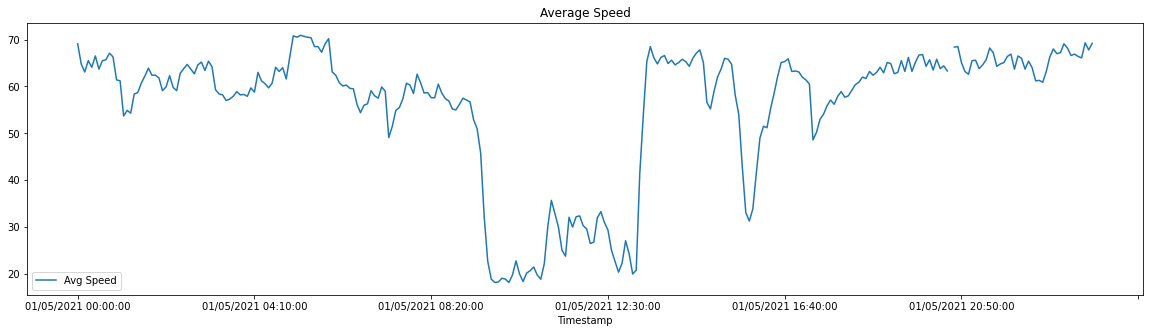

In [26]:
# same thing as above for station 760375
df.loc[df['Station'] == 760375, ['Timestamp', 'Avg Speed']].set_index('Timestamp').plot(figsize=[20, 5], title='Average Speed', color='tab:blue')


**How Does Occupancy Change Over Time for a Particular Station?**

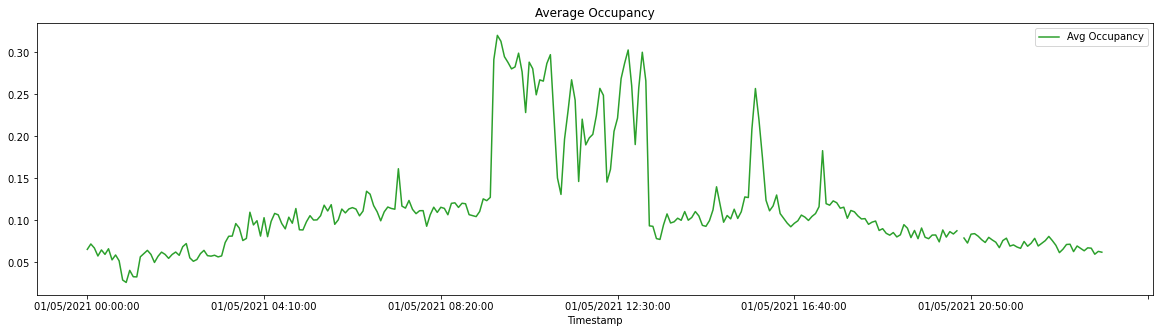

In [29]:
df.loc[df['Station'] == 760375, ['Timestamp', 'Avg Occupancy']].set_index('Timestamp').plot(figsize=[20, 5], title='Average Occupancy', color='tab:green')


**How Does Flow Change Over Time for a Particular Station**

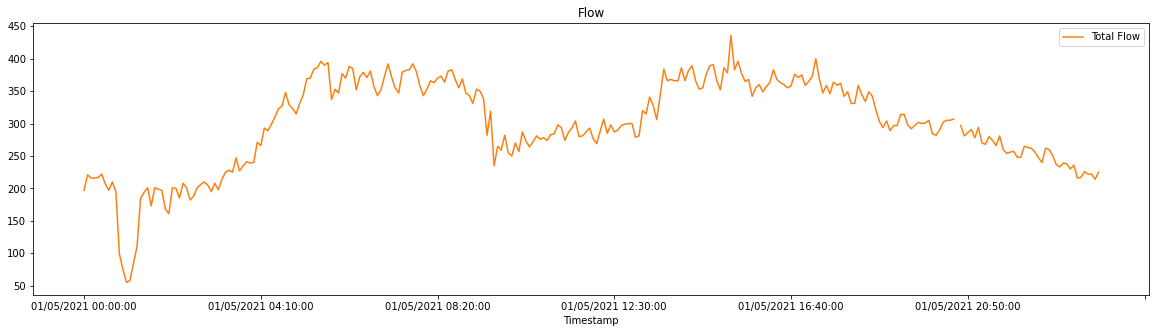

In [32]:
df.loc[df['Station'] == 760375, ['Timestamp', 'Total Flow']].set_index('Timestamp').plot(figsize=[20, 5], title='Flow', color='tab:orange')


**How Speed Changes with PM?**

In [97]:
def map_to_time_group(time):
    if time.hour >= 7 and time.hour <= 9:
        return 'Morning Commute'
    elif time.hour >= 16 and time.hour <= 18:
        return 'Evening Commute'
    else:
        return None
    
hwy_5_nb_stations_pm = meta.loc[(meta['Fwy'] == 5) & (meta['Dir'] == 'N'), ['ID', 'Abs_PM']].drop_duplicates()
route = df[df['Station'].isin(hwy_5_nb_stations_pm['ID'])].reset_index(drop=True)
route = route.merge(hwy_5_nb_stations_pm, left_on='Station', right_on='ID')
route['Time Group'] = pd.to_datetime(route['Timestamp']).map(map_to_time_group)

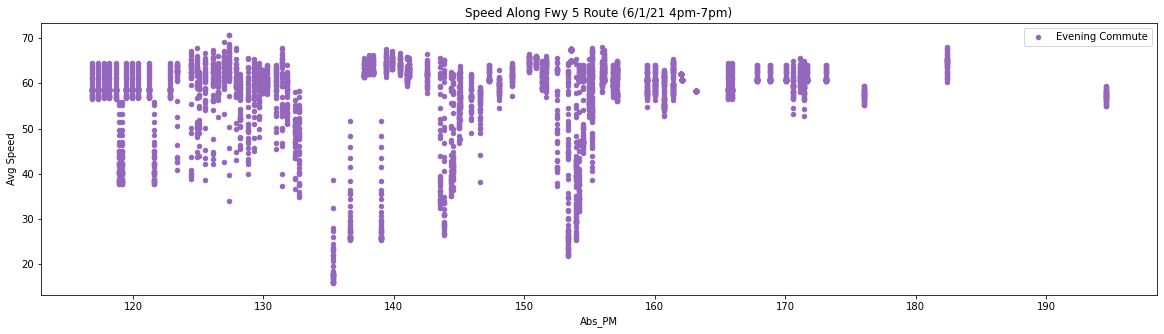

In [99]:
route[route['Time Group'] == 'Evening Commute'].plot.scatter(
    'Abs_PM', 'Avg Speed', color='tab:purple', label='Evening Commute', 
    figsize=(20,5), title='Speed Along Fwy 5 Route (6/1/21 4pm-7pm)'
)

**Speed vs. Time of Day for Month of June**

In [101]:
from tqdm.notebook import tqdm

In [103]:
meta

,ID,Fwy,Dir,Latitude,Longitude,Length,Type,Lanes,Abs_PM
0,715898,5,S,33.880183,-118.021787,0.430,ML,3,117.280
1,715900,5,S,33.882892,-118.026822,NaN,OR,1,117.630
2,715901,5,N,33.883400,-118.027451,NaN,OR,1,117.743
3,715903,5,N,33.886992,-118.034125,NaN,OR,1,118.193
4,715904,5,S,33.892489,-118.044573,NaN,OR,1,118.840
...,...,...,...,...,...,...,...,...,...
4878,777066,405,S,34.161152,-118.469631,0.455,ML,3,63.272
4879,777067,405,N,34.161136,-118.469426,0.790,HV,1,63.272
4880,777068,405,S,34.161152,-118.469631,0.790,HV,1,63.272
4881,777168,10,E,34.068993,-118.149756,0.450,HV,1,20.897


In [106]:
# load data for entire month of June
data_list = []
for i in tqdm( range(151, 181) ):
    with gzip.open(files[i]) as f:
        df = pd.read_csv(f, index_col=False, names=colnames)[colnames_subset]
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

        sub = df[[x in northbound_stations for x in df['Station']]]
        sub = pd.DataFrame(sub.reset_index(drop=True))
        sub = sub.merge(meta[['ID', 'Abs_PM']], left_on='Station', right_on='ID')
        data_list.append(sub)   
df = pd.concat(data_list)

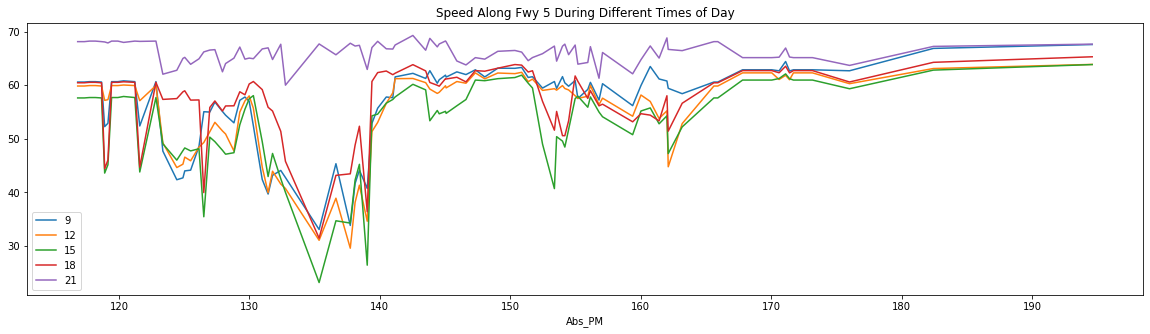

In [107]:
# compute average speed for different hours of the day along the route
d = {}
for h in [9, 12, 15, 18, 21]:
    d[h] = df[[x.hour == h for x in df['Timestamp']]].groupby('Abs_PM').mean()['Avg Speed']

pd.DataFrame(d).plot(figsize=(20,5), title='Speed Along Fwy 5 During Different Times of Day')

**Correlations**

In [34]:
import numpy as np

In [35]:
# correlation between speed and occupancy
corrs = []
for s in [760375, 769926, 769402, 776657, 716237, 774946, 771690, 716312]:
    df_sub = df[df['Station'] == s]
    corr = df_sub[['Avg Speed', 'Avg Occupancy']].corr()['Avg Speed']['Avg Occupancy']
    corrs.append(corr)

print(np.mean(corrs))

-0.7945766394221848


In [38]:
# correlation between rush hour and occupancy
# rush hour is an indicator of timestamp during morning or evening commute
corrs = []
for s in [760375, 769926, 769402, 776657, 716237, 774946, 771690, 716312]:
    df_sub = pd.DataFrame(df[df['Station'] == s])
    df_sub['Rush Hour'] = [1 if (x.hour >= 7 and x.hour <= 9) or (x.hour >= 16 and x.hour <= 18) else 0 for x in pd.to_datetime(df_sub['Timestamp'])]
    corr = df_sub[['Rush Hour', 'Avg Occupancy']].corr()['Rush Hour']['Avg Occupancy']
    corrs.append(corr)

print(np.mean(corrs))

0.39933668407396095


<a id='eda_processed_data'></a>

# EDA for Processed Data

In [ ]:
import pickle
import pandas as pd

In [ ]:
## save adj_mat 
with open('./data/processed/adj_mat.dat', 'rb')  as f:
    adj_mat = pickle.load(f)

## save mapper for adj_mat index to station ID
with open('./data/processed/adj_mat_ind_station_mapper.dat', 'rb') as f:
    ind_station_mapper = pickle.load(f)

## save full speed df concatenated for all days in 2021
with open('./data/processed/speeds.dat', 'rb')  as f:
    speed_df = pickle.load(f)

**Stations in Processed Data**

In [ ]:
with open('./data/loaded/meta.dat', 'rb') as f:
    meta = pickle.load(f)
meta_subs = meta[meta['ID'].isin(ind_station_mapper.values())].reset_index(drop=True)
dir_mapper = {'N': 'north', 'E': 'east', 'S': 'south', 'W': 'west'}

m = Map(location=(34.0522,-118.2437), tiles='https://tile.jawg.io/jawg-dark/{z}/{x}/{y}{r}.png?access-token=yxQukjQJyY3mRrF6htcGR22i1QJ6BP6wslSe2Cmq2k4aT8S0wbDtYMEaPhc8s240', attr='<a href="http://jawg.io" title="Tiles Courtesy of Jawg Maps" target="_blank">&copy; <b>Jawg</b>Maps</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', control_scale=True, max_bounds=True, prefer_canvas=True, zoom_start=10)
for ind, row in meta_subs.iterrows():  
    icon = folium.features.CustomIcon(f"./data/icons/{dir_mapper[row['Dir']]}.png", icon_size=(15, 15))
    style = 'font-family: Impact, Haettenschweiler, "Franklin Gothic Bold", Charcoal, "Helvetica Inserat", "Bitstream Vera Sans Bold", "Arial Black", "sans serif";'
    html = f'''<body style="{style}"><div align="center", style="background-color: #BAD6FF; font-family: Arial">''' + row.to_frame().transpose()[['ID', 'Fwy', 'Length', 'Type', 'Lanes']].transpose().to_html(justify="center", header=False, index=True, index_names=False, col_space=300, classes="table-condensed table-responsive table-success") + '</div></body>' 
    popup = folium.Popup(html, max_width=300)                
    folium.Marker(row[['Latitude', 'Longitude']].values.tolist(), icon=icon, popup=popup).add_to(m)
m.save('./plots/stations_processed.html')

**Distribution of % of Missing Speeds for Stations**

In [ ]:
speed_df.apply(lambda x: (x.isna().sum() / speed_df.shape[0])*100).describe()

In [ ]:
fig = px.box(speed_df.groupby([speed_df.index.month, speed_df.index.day]).mean().mean(axis=1), title='Distribution of Speed Over Days in 2021')
fig.update_xaxes(title="")
fig.update_yaxes(title="Speed (mph)")

**[Navigate to the Top](#top)**